# Programación para *Data Science*

## Unidad 6: Preprocesamiento de datos en Python


# Introducció

En este Notebook encontraréis dos conjuntos de ejercicios: un primer conjunto de **ejercicios para practicar** y un segundo conjunto de **actividades evaluables** como PEC de la asignatura.

En cuanto al conjunto de ejercicios para practicar, éstos no puntúan para la PEC, pero os recomendamos que los intentéis resolver como parte del proceso de aprendizaje. Encontraréis ejemplos de posibles soluciones a los ejercicios al propio notebook, pero es importante que intentéis resolverlos vosotros antes de consultar las soluciones. Las soluciones os permitirán validar vuestras respuestas, así como ver alternativas de resolución de las actividades. También os animamos a preguntar cualquier duda que surja sobre la resolución de los **ejercicios para practicar** en el foro del aula.

En relación a las actividades evaluables, veréis que cada una de ellas tiene asociada una puntuación que indica el peso que tiene la actividad sobre la nota de la PEC. Adicionalmente, hay un ejercicio opcional, que no tiene puntuación dentro de la PEC, pero que se valora al final del semestre de cara a conceder las matrículas de honor y redondear las notas finales. Podéis sacar la máxima nota de la PEC sin necesidad de hacer este ejercicio! El objetivo de este ejercicio es que sirva como pequeño reto para los estudiantes que quieran profundizar en el contenido de la asignatura.

Además, veréis que todas las actividades tienen una etiqueta que indica los recursos necesarios para llevarla a cabo. Hay tres posibles etiquetas:

* <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 3px; ">NM</span> **Sólo materiales**: las herramientas necesarias para realizar la actividad se pueden encontrar en los materiales de la asignatura. 

* <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span> **Consulta externa guiada**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, pero el enunciado contiene indicaciones de dónde o cómo encontrar la información adicional necesaria para resolver la actividad.

* <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> **Consulta externa independente**: la actividad puede requerir hacer uso de herramientas que no se encuentran en los materiales de la asignatura, y el enunciado puede no incluir la descripción de dónde o cómo encontrar esta información adicional. Será necesario que el estudiante busque esta información utilizando los recursos que se han explicado en la asignatura.

Es importante notar que estas etiquetas no indican el nivel de dificultad del ejercicio, sino únicamente la necesidad de consulta de documentación externa para su resolución. Además, recordad que las **etiquetas son informativas**, pero podréis consultar referencias externas en cualquier momento (aunque no se indique explícitamente) o puede ser que podáis hacer una actividad sin consultar ningún tipo de documentación. Por ejemplo, para resolver una actividad que sólo requiera los materiales de la asignatura, puedéis consultar referencias externas si queréis, ya sea tanto para ayudaros en la resolución como para ampliar el conocimiento!

En cuanto a la consulta de documentación externa en la resolución de los ejercicios, recordad **citar siempre la bibliografía utilizada** para resolver cada actividad.

____

#### Alumno: Nicolás D'Alessandro

___

#### Entrega: 16 Diciembre de 20194

___

# Ejercicios para la PEC

A continuación, los **ejercicios y preguntas teóricas que debe completar en esta PEC** y que forman parte de la evaluación de esta unidad.

# Ejercicio 1

Importa el fichero `siri.csv` de la carpeta de datos. En ella encontrarás notas (en un rango de 0 a 10) correspondientes a estudiantes de tres escuelas diferentes para cuatro asignaturas. Una vez importados los datos, realiza las siguientes operaciones:

a) Muestra por pantalla una lista de las diferentes escuelas en los datos. En caso no observar tres escuelas por errores tipográficos, mayúsculas y otros, corrige la nomenclatura para homogeneizar una columna con las tres escuelas. 


**(1 punto)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>



In [1]:
#antes de comenzar, importamos todas las librerias necesarias
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import KNNImputer

In [2]:
#creamos el path a la carpeta DATA
path = r'/Users/nicolasdalessandro/Desktop/Modulo 6/Data/'

In [3]:
#leemos el dataset
siri = pd.read_csv(path + 'siri.csv')

In [4]:
#observamos su contenido
siri.head()

,maths,literature,physics,history,school
0,5.1,3.5,1.4,0.2,Summer
1,4.9,3.0,1.4,0.2,Summer
2,4.7,3.2,1.3,0.2,Summer
3,4.6,3.1,1.5,0.2,summer
4,5.0,3.6,1.4,0.2,Summer


In [5]:
#observamos también el número de filas y columnas de nuestro dataset
siri.shape

(150, 5)

In [6]:
#convertimos todos los valores de la columna al mismo formato usando la función "capitalize"
siri['school'] = [i.lower().capitalize() for i in siri['school'] if i != 'NaN']

In [7]:
#observamos los diferentes valores en la columna sobre la cual trabajaremos
siri['school'].value_counts()

Winter    50
Spring    49
Summer    46
Sumer      3
Sprng      1
Ummer      1
Name: school, dtype: int64

In [8]:
#transformamos los valores al texto correcto
siri.loc[(siri.school == "Sumer") | (siri.school == "Ummer")] = "Summer"
siri.loc[(siri.school == "Sprng")] = "Spring"

# Realizamos la comprobación
s = siri['school'].unique()
print("There are {} different of schols in our dataset:\n{}".format(len(s), s))

There are 3 different of schols in our dataset:
['Summer' 'Winter' 'Spring']



b) Buscar notas claramente anómalas. En caso de encontrar notas anómalas sustitúyelas por NaN.


**(1 punto)**  <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


In [9]:
#antes de comenzar obtenemos el "dtype" de cada feature en nuestro dataset
siri.dtypes

maths         object
literature    object
physics       object
history       object
school        object
dtype: object

In [10]:
#convertimos las columnas correspondientes a numérico, utilizando "coerce" para transformar a Nan los valores
#categóricos que hay en las columnas
siri.iloc[:,0:4] = siri.iloc[:,0:4].apply(pd.to_numeric, errors = 'coerce')

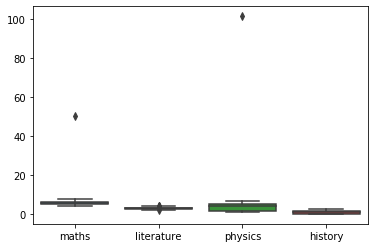

In [11]:
#realizamos una visualización con "boxplots" para observar de forma gráfica los outlyers
ax = sns.boxplot(data=siri.drop(columns='school'))

In [12]:
#iteramos sobre las columnas numéricas para observar tambien de esta forma los valores 
index = 0
for i in siri.columns[0:4]:
    print(siri.columns[index], siri[i].unique())
    index +=1

maths [5.1 4.9 4.7 4.6 5.0 50.4 4.4 nan 5.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.0
 6.4 6.9 6.5 6.3 6.6 5.9 6.0 6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4
 7.9]
literature [3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 nan 3.7 4.0 4.4 3.8 3.3 4.1 4.2 2.3 2.8
 2.4 2.7 2.0 2.2 2.5 2.6]
physics [1.4 1.3 1.5 nan 1.6 1.1 1.2 1.7 1.0 1.9 101.4 4.7 4.5 4.9 4.0 4.6 3.3 3.9
 3.5 4.2 3.6 4.4 4.1 4.8 4.3 5.0 3.8 3.7 5.1 3.0 6.0 5.9 5.6 5.8 6.6 6.3
 6.1 5.3 5.5 6.7 6.9 5.7 5.4 5.2]
history [0.2 0.4 0.3 nan 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1.1 1.8 1.2 1.7 2.5 1.9
 2.1 2.2 2.0 2.4 2.3]


In [13]:
#asumiendo que las notas siempre van entre 1 y 10, cambiamos los valores anómalos

#Nota para el profesor: Siendo que en el proximo paso los NaN se deberán reemplazar con la media de la columna, he
#decidido a las dos notas anómalas reemplazarlas por la media en este paso directamente.

for column in siri.columns[0:4]:
    for note in siri[column]:
        if note > 10:
            siri[column].replace({note: round(siri[column].mean(), 2)}, inplace= True)

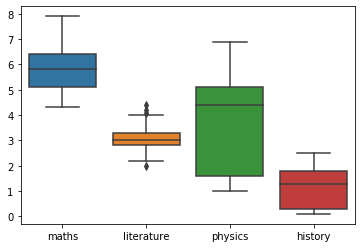

In [14]:
#volvemos a realizar un boxplot para comprobar efectivamente que no hay valores anómalos
ax = sns.boxplot(data=siri.drop(columns='school'))


c) Encuentra los valores perdidos. Imputa los valores perdidos por la media de los datos por columna 


**(0.5 puntos)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>



In [15]:
#para el resto de valores nulos, creamos una función para transformar según el enunciado

def imput_nulls(data, ini,fin):
    '''
    This function imput the mean of each column to the null values in each one:
    >>> Parameter 1: [DataFrame] Pandas DataFrame.
    >>> Parameter 2: [int] Init parameter of hour column filter range.
    >>> Parameter 3: [int] End parameter of hour column filter range.
    ------------------------------------------------
    <<< Return: Status Message.
    '''
    try:
        for column in data.columns[ini:fin]:
            data[column] = data[column].fillna(data[column].mean()).round(2)
        return "NaN sucsefully imputed"
    except:
        return "It has been error, check the parameters and try again"     

In [16]:
#ejecutamos nuestra función
imput_nulls(siri, 0, 4)

'NaN sucsefully imputed'

d) Comprueba que ya no hay valores perdidos en el objeto pandas. 

**(0.5 puntos)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>


In [17]:
#creamos un función para la comprobación de valores nulos

def nullvalues_feature_count(data):
    '''
    This function displays the correspondig count of the null values in each column:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Sum of null values in each column.
    '''
    for column in data.columns:
        print("There are {} null values in the column:{}".format(data[column].isna().sum(), column))

In [18]:
#ejecutamos nuestra función
nullvalues_feature_count(siri)

There are 0 null values in the column:maths
There are 0 null values in the column:literature
There are 0 null values in the column:physics
There are 0 null values in the column:history
There are 0 null values in the column:school


## Ejercicio 2


En este ejercicio trabajaremos un conjunto de datos que se derivó del censo estadounidense de 1990, utilizando una fila por censo
dentro de un grupo de viviendas o bloques. Un grupo de bloques es la unidad geográfica más pequeña para la que La Oficina del Censo de  EE.UU.
publica datos de muestra (un grupo de bloques generalmente tiene una población
de 600 a 3,000 personas).


  - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297





a) Generar un objeto `pandas` de nombre `housings` con los datos que genera la función `datasets.fetch_california_housing()` dentro de `sklearn`. El objeto debe contener todas las variables del conjunto de datos incluida una columna con los valores de  `Prices` (target). 


**(1 punto)**  <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

In [19]:
#extraemos la data de la librería
fetched_data = datasets.fetch_california_housing()

In [20]:
#comprobamo el "type" de la misma
type(fetched_data)

sklearn.utils.Bunch

In [21]:
#transformamos la misma en un pandas DataFrame
housings = pd.DataFrame(data= np.c_[fetched_data['data'], fetched_data['target']],
                     columns= fetched_data['feature_names'] + ['Prices'])

In [22]:
#observamos el contenido del dataset
housings.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


b) Obtener, los nombres de las variables, el número total de filas y columnas, y comprobar la posible existencia de valores perdidos en los datasets. Obtener la media, desviación típica, valores máximos y mínimos de todas las variables del data frame.


**(0.5 puntos)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [23]:
#creamos una función para obtener las columnas del df
def data_col_info(data):
    '''
    This function displays basic information about the given dataset.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: List of the Features/Columns names.
    '''
    return data.columns

In [24]:
#ejecutamos la función creada
data_col_info(housings)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Prices'],
      dtype='object')

In [25]:
#creamos una función para obetener la forma de nuestro dataset
def data_shape_info(data):
    '''
    This function displays basic information about the given dataset.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Shape (rows, columns) for the dataframe given
    '''
    return data.shape

In [26]:
#ejecutamos la función creada
data_shape_info(housings)

(20640, 9)

In [27]:
#utilizamos la función creada en el ejercicio anterior para obtener la descripción de los valores nulos en columnas
nullvalues_feature_count(housings)

There are 0 null values in the column:MedInc
There are 0 null values in the column:HouseAge
There are 0 null values in the column:AveRooms
There are 0 null values in the column:AveBedrms
There are 0 null values in the column:Population
There are 0 null values in the column:AveOccup
There are 0 null values in the column:Latitude
There are 0 null values in the column:Longitude
There are 0 null values in the column:Prices


In [28]:
#creamos una función para obtener la descripción estadística básica solicitada en el enunciado
def data_describe(data):
    '''
    This function displays a basic description about the numerical features in the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Dataset basic description.
    '''
    print('Numerical values description:')
    return data.describe().round(2)

In [29]:
data_describe(housings)

Numerical values description:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


c) Calcula la correlación de la variable `Prices` con el resto de variables. Ordena el vector de correlaciones de mayor a menor en valor absoluto. ¿Qué variable aparece con más correlación con los precios? Interpreta los resultados.


**(0.5 puntos)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [182]:
#creamos una función para obtener las correlaciones y una matriz piramidal de la misma
def data_corr(data, column):
    '''
    This function displays a the correlation between each column of the datast given and the selected column:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        >>> Parameter 2: [Str] Column selected to evaluate the correlations.
        ------------------------------------------------
        <<< Return: Correlations values.
    '''
    
    corr = data.corr()[column]
    matrix = abs(corr).sort_values(ascending=False).round(2)
    
    return matrix

In [183]:
data_corr(housings, 'Prices')

Prices        1.00
MedInc        0.69
AveRooms      0.15
Latitude      0.14
sLat          0.14
qLat          0.13
HouseAge      0.11
qLon          0.09
sLon          0.07
AveBedrms     0.05
Longitude     0.05
Population    0.02
AveOccup      0.02
Name: Prices, dtype: float64

<span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">INTERPRETACIÓN DE LOS RESULTADOS:</span> Podemos observar que la feature 'MedInc' es la que más correlaciona con nuestra variable 'Target' (Prices), lo que podria significar en principio que es la más útil para la predicción del precio de las casas. 

**Nota**: La variable Prices con ella misma obviamente correlaciona 100%.

## Ejercicio 3

Con el mismo dataset anterior:




a) Con cada una de las variables `Latitude` y `Longitude`, crea dos variables discretizadas con 10 segmentos, de forma que:

- en las primeras cada intervalo contenga el mísmo número de muestras (equidensidad por segmento) en (`qLat`, `qLon`) 
- en las segundas cada intervalo tengan la misma longitud de intervalo (equidistancia por segmento) en (`sLat`,`sLon`) 


**(1 punto)**  <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

In [168]:
#generamos el "preprocessing._discretization"
disc = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
disc2 = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')

In [169]:
#aplicamos fit transform y creamos las columnas solicitadas en el enunciado
column1 = pd.DataFrame(disc.fit_transform(housings[['Latitude']]), columns= ['qLat'])
column2 = pd.DataFrame(disc.fit_transform(housings[['Longitude']]), columns= ['qLon'])
column3 = pd.DataFrame(disc2.fit_transform(housings[['Latitude']]), columns= ['sLat'])
column4 = pd.DataFrame(disc2.fit_transform(housings[['Longitude']]), columns= ['sLon'])

In [170]:
#agregamos la columnas ak dataset original
housings['qLat'] = column1
housings['qLon'] = column2
housings['sLat'] = column3
housings['sLon'] = column4

In [171]:
#visualizamos el dataset
housings.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices,qLat,qLon,sLat,sLon
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,8.0,1.0,5.0,2.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,8.0,1.0,5.0,2.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,8.0,1.0,5.0,2.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,8.0,1.0,5.0,2.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,8.0,1.0,5.0,2.0


b) Observa la distribución en las variables discretizadas calculando el número de muestras dentro de cada intérvalo. Podéis mirar el método de pandas .value_counts() para contar valores de cada grupo. 

**(0.5 puntos)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span> 

In [172]:
#utilizamos el método value_counts() para obtener los resultados solicitados
print("Número de muestras en el intervalo 'qLat': \n{}\n".format(housings['qLat'].value_counts()))
print("Número de muestras en el intervalo 'qLon': \n{}\n".format(housings['qLon'].value_counts()))
print("Número de muestras en el intervalo 'sLat': \n{}\n".format(housings['sLat'].value_counts()))
print("Número de muestras en el intervalo 'sLon': \n{}\n".format(housings['sLon'].value_counts()))

Número de muestras en el intervalo 'qLat': 
3.0    2087
9.0    2086
1.0    2073
7.0    2069
5.0    2069
4.0    2068
8.0    2056
0.0    2049
6.0    2047
2.0    2036
Name: qLat, dtype: int64

Número de muestras en el intervalo 'qLon': 
9.0    2133
7.0    2111
1.0    2101
3.0    2099
6.0    2082
4.0    2064
2.0    2054
8.0    2045
0.0    2000
5.0    1951
Name: qLon, dtype: int64

Número de muestras en el intervalo 'sLat': 
1.0    8987
5.0    4712
0.0    1796
6.0    1740
4.0    1292
2.0     747
7.0     490
3.0     474
8.0     324
9.0      78
Name: sLat, dtype: int64

Número de muestras en el intervalo 'sLon': 
6.0    6208
2.0    4564
5.0    2887
7.0    2252
3.0    1673
1.0    1553
4.0    1098
0.0     190
8.0     183
9.0      32
Name: sLon, dtype: int64



c) Muestra

- los precios promedio por cada segmento de Latitud (sLat)

- los precios promedio por cada segmento de Longitud (sLon)


**(1 punto)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [173]:
#creamos una función que devuelva la agrupación simple, según parámetros y su correspondiente gráfica
def group_by_single(data, group, column, method, grouped_name):
    '''
    This function create a single group_by regarding the given parameters:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        >>> Parameter 2: [Str] Column we want to group our DataFrame.
        >>> Parameter 3: [Str] Column in our dataframe we want to be the agregatted calculation.
        >>> Parameter 4: [Str] Method we want to perform our calculation (e.g. 'mean', 'std', etc.).
        >>> Parameter 5: [Str] Title for our aggrupation.
        ------------------------------------------------
        <<< Return: Grouped columns and a simple chart.
    '''
    grouped = data.groupby(group).agg({column:method}).round(2)
    
    fig = plt.subplots(figsize= (8,4))
    plt.bar(grouped.index, grouped[column])
    plt.xlabel(group, fontsize= 'large')
    plt.ylabel(column, fontsize= 'large')
    plt.title(grouped_name, fontsize= 'x-large')
    plt.xticks(grouped.index)
    
    plt.show() 
    
    return grouped

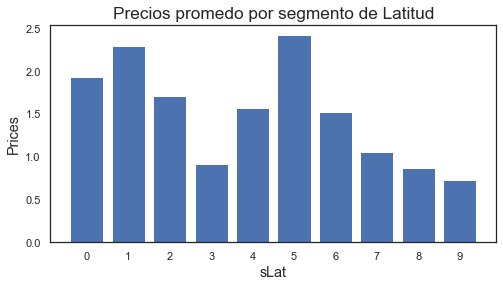

,Prices
sLat,
0.0,1.93
1.0,2.29
2.0,1.71
3.0,0.91
4.0,1.57
5.0,2.42
6.0,1.52
7.0,1.05
8.0,0.87


In [174]:
#aplicamos la función creada
group_by_single(housings, 'sLat', 'Prices', 'mean', 'Precios promedo por segmento de Latitud')

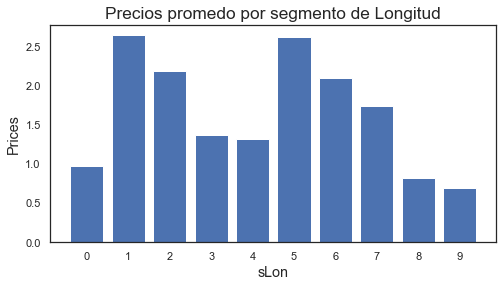

,Prices
sLon,
0.0,0.97
1.0,2.64
2.0,2.19
3.0,1.37
4.0,1.32
5.0,2.62
6.0,2.09
7.0,1.74
8.0,0.82


In [175]:
#aplicamos la función creada para el segundo segmento a evaluar solicitado
group_by_single(housings, 'sLon', 'Prices', 'mean', 'Precios promedo por segmento de Longitud')

d) Calcula y muestra la media y la desviación típica para todas las variables para cada combinación de Latitud y Longitud en ambos casos (equidensidad por segmento, equidistancia por segmento). 
Observación: quita las filas que contengan algún NaN del dataframe resultante. 

**(1 punto)**  <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

In [ ]:
#aplicamos la agrupación por combinación tal lo pide el enunciado

**NOTA PARA EL PROFESOR:** No se si entendí bien el enunciado, ya que el dataframe resultante no me dió en ningún caso un valor nulo

In [245]:
df1 = housings.groupby(['sLat']).agg(['mean','std']).round(2)
df1

MedInc       HouseAge        AveRooms       AveBedrms       Population  \
       mean   std     mean    std     mean   std      mean   std       mean   
sLat                                                                          
0.0    3.74  1.71    23.35  11.34     5.32  1.30      1.08  0.16    1469.44   
1.0    4.05  2.00    30.16  11.71     5.19  1.81      1.08  0.28    1537.01   
2.0    3.54  1.50    21.69  11.59     5.60  1.12      1.09  0.15    1655.53   
3.0    2.73  1.17    24.69  10.93     5.51  1.98      1.14  0.50    1254.34   
4.0    3.47  1.74    25.81  11.50     5.56  2.11      1.09  0.37    1369.08   
5.0    4.26  2.04    32.29  13.73     5.42  1.65      1.07  0.27    1303.35   
6.0    3.45  1.33    24.55  11.95     6.13  5.50      1.19  1.17    1341.50   
7.0    2.63  0.91    24.27  11.48     6.75  5.16      1.35  0.98     966.42   
8.0    2.54  0.88    25.27  11.24     5.99  3.70      1.26  0.95    1020.03   
9.0    2.25  0.55    25.05   9.28     5.98  1.14      1.25  0.31    1152.50   

               ... Longitude       Prices        qLat        qLon        sLon  \
          std  ...      mean   std   mean   std  mean   std  mean   std  mean   
sLat           ...                                                              
0.0   1364.25  ...   -117.03  0.43   1.93  1.00  0.00  0.00  8.85  0.40  7.01   
1.0   1140.58  ...   -118.07  0.51   2.29  1.13  2.56  1.28  6.40  1.38  5.81   
2.0   1501.54  ...   -119.10  1.27   1.71  1.08  5.00  0.00  4.84  2.01  4.73   
3.0    742.15  ...   -119.30  0.81   0.91  0.55  5.00  0.00  4.12  1.16  4.61   
4.0   1216.59  ...   -120.57  1.07   1.57  1.11  5.71  0.46  3.04  1.11  3.25   
5.0    955.27  ...   -121.93  0.59   2.42  1.22  7.08  0.74  1.33  1.07  2.00   
6.0   1184.63  ...   -121.71  0.73   1.52  0.67  8.69  0.46  1.75  1.19  2.07   
7.0    737.23  ...   -121.70  0.92   1.05  0.42  9.00  0.00  1.86  1.03  2.16   
8.0    629.89  ...   -122.83  1.10   0.87  0.26  9.00  0.00  0.54  0.99  1.10   
9.0    661.79  ...   -122.78  1.14   0.73  0.24  9.00  0.00  0.58  1.08  1.12   

            
       std  
sLat        
0.0   0.38  
1.0   0.61  
2.0   1.43  
3.0   0.87  
4.0   1.07  
5.0   0.69  
6.0   0.81  
7.0   0.98  
8.0   1.03  
9.0   1.10  

[10 rows x 24 columns]

In [239]:
#verificamos si hay algún valor nulo
df1.isna().any().sum()

0

In [240]:
df2 = housings.groupby(['sLon']).agg(['mean','std']).round(2)
df2

MedInc       HouseAge        AveRooms        AveBedrms       Population  \
       mean   std     mean    std     mean    std      mean   std       mean   
sLon                                                                           
0.0    2.48  0.76    28.76  11.40     5.45   1.21      1.17  0.29     968.95   
1.0    3.89  1.79    34.85  14.18     5.34   1.33      1.10  0.24    1217.35   
2.0    4.20  2.04    29.66  12.91     5.49   1.36      1.06  0.19    1375.03   
3.0    3.20  1.22    23.09  11.64     5.66   2.05      1.11  0.45    1273.51   
4.0    3.12  1.45    25.05  11.41     6.77   7.71      1.35  1.60    1116.06   
5.0    4.35  2.25    30.29  11.24     5.32   2.01      1.08  0.38    1475.85   
6.0    3.90  1.85    30.13  11.77     5.03   1.30      1.05  0.09    1558.89   
7.0    3.61  1.64    22.64  11.81     5.73   2.39      1.15  0.44    1562.06   
8.0    2.64  1.26    20.96   9.34     5.62   2.09      1.27  0.45    1260.55   
9.0    1.95  0.77    22.53   9.13     7.97  10.31      1.87  2.33     899.16   

               ... Longitude       Prices        qLat        qLon        sLat  \
          std  ...      mean   std   mean   std  mean   std  mean   std  mean   
sLon           ...                                                              
0.0    462.69  ...   -123.96  0.27   0.97  0.36  9.00  0.00  0.00  0.00  7.91   
1.0    786.60  ...   -122.55  0.20   2.64  1.28  7.73  0.79  0.00  0.00  5.56   
2.0   1177.99  ...   -121.94  0.28   2.19  1.16  7.31  1.18  1.46  0.65  5.25   
3.0    958.25  ...   -120.95  0.31   1.37  0.60  7.40  1.44  3.00  0.00  4.96   
4.0    710.30  ...   -119.79  0.23   1.32  1.06  5.97  1.22  3.75  0.43  3.82   
5.0   1150.71  ...   -118.62  0.31   2.62  1.37  3.74  1.20  4.57  0.50  1.38   
6.0   1199.29  ...   -118.01  0.25   2.09  0.97  2.26  1.26  6.84  0.88  1.02   
7.0   1252.60  ...   -117.09  0.19   1.74  0.93  0.88  1.57  8.85  0.36  0.35   
8.0   1302.70  ...   -115.81  0.32   0.82  0.42  0.69  1.30  9.00  0.00  0.41   
9.0    840.98  ...   -114.65  0.17   0.69  0.41  1.62  2.15  9.00  0.00  1.03   

            
       std  
sLon        
0.0   0.67  
1.0   0.91  
2.0   0.82  
3.0   1.44  
4.0   1.36  
5.0   0.86  
6.0   0.27  
7.0   0.56  
8.0   0.58  
9.0   0.65  

[10 rows x 24 columns]

In [241]:
#verificamos si hay algún valor nulo
df2.isna().any().sum()

0

In [242]:
df3 = housings.groupby(['qLat']).agg(['mean','std']).round(2)
df3

MedInc       HouseAge        AveRooms       AveBedrms       Population  \
       mean   std     mean    std     mean   std      mean   std       mean   
qLat                                                                          
0.0    3.97  1.95    22.73  11.46     5.44  1.36      1.08  0.16    1454.03   
1.0    4.44  1.86    25.61  10.81     5.41  1.63      1.08  0.24    1557.51   
2.0    3.68  1.64    32.04  10.27     4.98  1.75      1.06  0.31    1487.60   
3.0    3.49  2.09    34.21  11.43     4.62  1.32      1.06  0.10    1544.36   
4.0    4.31  2.08    31.06  11.79     5.45  2.07      1.09  0.37    1570.49   
5.0    3.46  1.57    24.44  11.30     5.59  1.82      1.11  0.33    1472.20   
6.0    4.42  2.22    26.51  11.39     5.55  1.91      1.07  0.32    1412.19   
7.0    3.97  1.74    35.49  13.98     5.28  1.87      1.07  0.33    1302.51   
8.0    3.99  1.89    29.38  13.95     5.70  2.03      1.09  0.38    1260.66   
9.0    2.98  1.22    24.89  11.70     6.27  5.57      1.26  1.19    1194.00   

               ... Longitude       Prices        qLon        sLat        sLon  \
          std  ...      mean   std   mean   std  mean   std  mean   std  mean   
qLat           ...                                                              
0.0   1365.44  ...   -117.09  0.50   2.08  1.14  8.75  0.49  0.12  0.33  6.91   
1.0   1029.47  ...   -117.88  0.47   2.38  1.00  7.08  1.07  1.00  0.00  6.07   
2.0   1204.41  ...   -118.06  0.37   1.92  0.95  6.43  1.10  1.00  0.00  5.86   
3.0   1092.93  ...   -118.08  0.37   2.24  1.25  6.33  1.27  1.00  0.00  5.78   
4.0   1177.17  ...   -118.18  0.52   2.49  1.15  5.94  1.51  1.00  0.00  5.67   
5.0   1326.02  ...   -119.27  1.13   1.62  1.07  4.37  1.60  2.37  1.03  4.57   
6.0   1005.28  ...   -121.31  0.97   2.30  1.32  2.27  1.10  4.55  0.50  2.58   
7.0    979.65  ...   -122.01  0.59   2.49  1.18  1.04  1.10  5.00  0.00  1.83   
8.0   1002.52  ...   -121.99  0.59   1.98  1.06  1.27  1.13  5.27  0.44  2.00   
9.0    996.48  ...   -121.80  0.97   1.20  0.58  1.77  1.18  6.66  0.87  2.01   

            
       std  
qLat        
0.0   0.50  
1.0   0.49  
2.0   0.46  
3.0   0.54  
4.0   0.67  
5.0   1.22  
6.0   0.89  
7.0   0.76  
8.0   0.71  
9.0   0.99  

[10 rows x 24 columns]

In [243]:
#verificamos si hay algún valor nulo
df3.isna().any().sum()

0

In [248]:
df4 = housings.groupby(['qLon']).agg(['mean','std']).round(2)
df4

MedInc       HouseAge        AveRooms       AveBedrms       Population  \
       mean   std     mean    std     mean   std      mean   std       mean   
qLon                                                                          
0.0    3.76  1.76    34.00  13.79     5.36  1.29      1.10  0.23    1191.37   
1.0    4.49  2.23    33.08  12.73     5.48  1.25      1.05  0.11    1228.20   
2.0    3.96  1.87    26.40  12.28     5.49  1.51      1.07  0.27    1537.23   
3.0    3.23  1.24    22.74  11.21     6.32  5.72      1.24  1.20    1234.78   
4.0    3.79  2.01    25.81  11.13     5.69  2.45      1.11  0.50    1454.36   
5.0    4.31  2.25    34.63  10.34     4.91  1.29      1.06  0.13    1357.70   
6.0    2.96  1.49    36.06  10.13     4.26  1.08      1.06  0.08    1520.71   
7.0    4.33  1.63    30.07   9.35     5.27  1.08      1.04  0.08    1463.69   
8.0    4.39  2.01    21.91  11.61     5.69  1.34      1.07  0.14    1728.99   
9.0    3.52  1.64    22.26  11.28     5.78  2.77      1.17  0.55    1531.63   

               ... Longitude       Prices        qLat        sLat        sLon  \
          std  ...      mean   std   mean   std  mean   std  mean   std  mean   
qLon           ...                                                              
0.0    765.81  ...   -122.66  0.47   2.42  1.31  7.86  0.82  5.78  1.14  1.03   
1.0    916.92  ...   -122.14  0.10   2.47  1.23  7.19  0.88  5.12  0.64  2.00   
2.0   1407.34  ...   -121.74  0.19   1.96  1.02  7.29  1.43  5.31  0.94  2.00   
3.0    964.32  ...   -120.87  0.42   1.37  0.64  7.47  1.46  5.02  1.42  3.06   
4.0   1098.62  ...   -119.22  0.44   1.75  1.28  4.97  0.77  2.48  1.33  4.60   
5.0    994.38  ...   -118.39  0.05   2.96  1.25  3.01  1.12  1.04  0.33  5.16   
6.0    923.46  ...   -118.22  0.05   1.84  0.86  2.58  1.10  1.03  0.21  6.00   
7.0    990.69  ...   -118.02  0.07   2.29  0.89  2.12  1.19  1.03  0.19  6.00   
8.0   1637.14  ...   -117.61  0.21   2.06  1.12  2.01  1.55  0.94  0.45  6.16   
9.0   1231.50  ...   -116.92  0.49   1.64  0.87  0.67  1.38  0.31  0.54  7.12   

            
       std  
qLon        
0.0   0.47  
1.0   0.00  
2.0   0.00  
3.0   0.45  
4.0   0.49  
5.0   0.36  
6.0   0.00  
7.0   0.00  
8.0   0.37  
9.0   0.36  

[10 rows x 24 columns]

In [249]:
#verificamos si hay algún valor nulo
df4.isna().any().sum()

0

## Ejercicio 4

### Estandarización de variables.

Importa el dataset `iris` de `sklearn`. Almacena este dataset como un objeto `pandas`, con los correpondientres nombres de variables. 

Llamamos tipificar una variable al proceso de convertirla en una Normal Estándar $N(\mu=0,\sigma =1)$.
Busca en `sklearn.preprocessing` un método que te permita tipificar cada variable numérica del objeto pandas de `iris` de forma que:

- El valor medio de cada columna sea 0
- La desviación típica de cada columna sea 1

a) Aplica el método para crear un nuevo dataframne `iris_typ` que cumpla esas condiciones.  Comprueba que la tipificación es correcta.

**(1 punto)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

In [41]:
#importamos el dataset y lo transformamos en un pandas DataFrame
iris_loaded = datasets.load_iris()
iris = pd.DataFrame(iris_loaded['data'],columns=iris_loaded['feature_names'])
iris['Species'] = iris_loaded['target_names'][iris_loaded['target']]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
#aplicamos preprocessing.scale y comprobamos los valores
iris_typ = pd.DataFrame(preprocessing.scale(iris.drop(columns='Species')), columns= iris.columns[0:4])
print("El valor medio para cada columna es: \n{}\n".format(iris_typ.mean(axis=0)))
print("La desviación típica para cada columna es: \n{}\n".format(iris_typ.std(axis=0)))

El valor medio para cada columna es: 
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

La desviación típica para cada columna es: 
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64



b) Busca y aplica un segundo mecanismo de normalización de forma que:

- el mínimo de la variable sea 0, y 
- el máximo de cada variable sea 1 

Comprueba que la normalizacion es correcta

**(0.5 puntos)** <span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">EG</span>

In [212]:
#aplicamos preprocessing.MinMaxScaler() y comprobamos los valores
min_max_scaler = preprocessing.MinMaxScaler()
iris_typ_minmax = pd.DataFrame(min_max_scaler.fit_transform(iris.drop(columns='Species')), columns= iris.columns[0:4])
print("El valor medio para cada columna es: \n{}\n".format(iris_typ_minmax.min(axis=0)))
print("La desviación típica para cada columna es: \n{}\n".format(iris_typ_minmax.max(axis=0)))

El valor medio para cada columna es: 
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

La desviación típica para cada columna es: 
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64



### Ejercicio Opcional


La Oficina de Estadísticas de Transporte del Departamento de Transporte de los Estados Unidos (DOT) rastrea el rendimiento en término de puntualidad de los vuelos en EE.UU. operados por grandes compañías aéreas. 

La información resumida sobre el número de vuelos puntuales, retrasados, cancelados y desviados se publica en el Informe mensual del consumidor de viajes aéreos del DOT y en este conjunto de datos de retrasos y cancelaciones de vuelos de 2015. Encontrarás una muestra de estos datos en el fichero `vuelos.csv` en la carpeta de datos. 

Importa el fichero de vuelos. Imputa los valores perdidos con el método KNNImputer con los valores por defecto.

Calcula y muestra la matriz de correlación de las siguientes variables a partir de la matriz imputada. 

- `ARRIVAL_DELAY`
- `DIVERTED`
- `CANCELLED`	
- `AIR_SYSTEM_DELAY`
- `SECURITY_DELAY`
- `AIRLINE_DELAY`
- `LATE_AIRCRAFT_DELAY`
- `WEATHER_DELAY`

Interpreta el resultado


 <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span>

In [44]:
#importamos el dataset
df = pd.read_csv(path + 'vuelos.csv', sep=';', index_col='Unnamed: 0', decimal=",")

In [45]:
#creamos algunas funciones para hacer un poco de análisis exploratio y limpieza de nuestro dataset

In [46]:
def cleanUp_columns(data):
    '''
    This function map column names with values in lowercase and low_uderscore instead of spaces if apply.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: None
    '''
    data.rename(columns= {column: column.lower().replace(' ', '_') for column in data.columns.tolist()}, 
                inplace = True)

In [47]:
def info(data):
    '''
    This function displays basic information about the given dataset.
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Dataset basic info.
    '''
    print('Column data types and description: \n')
    return data.info()

In [48]:
def describe(data):
    '''
    This function displays a basic description about the numerical features in the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Dataset basic description.
    '''
    print('Numerical values description:')
    return data.describe().round(2)

In [149]:
def nullvaluesf_count(data):
    '''
    This function displays the features that contains null values as well as the correspondig count:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Features with null values and count.
    '''
    print('Features with null values:')
    null_values = {}
    for i in data.columns[data.isnull().any()]:
        null_values[i] = data.shape[0] - data.loc[:, i].count()
    return null_values

In [150]:
def categorical_info(data):
    '''
    This function displays name and count of unique values of the categorical features in the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Categorical features and count uniques
    '''
    print('Categorical features counts:')
    return data.select_dtypes(include= 'object').apply(lambda x: x.count())

In [151]:
def numerical_info(data):
    '''
    This function displays name and count of unique values of the numerical features in the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Numerical features and count uniques
    '''
    print('Numerical features counts:')
    return data.select_dtypes(include= ['int', 'float']).apply(lambda x: x.count())

In [152]:
#aplicamos las funciones creadas

In [153]:
cleanUp_columns(df)

In [154]:
df.columns

Index(['year', 'month', 'day', 'day_of_week', 'airline', 'flight_number',
       'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay'],
      dtype='object')

In [155]:
info(df)

Column data types and description: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 31 columns):
year                   1000 non-null int64
month                  1000 non-null int64
day                    1000 non-null int64
day_of_week            1000 non-null int64
airline                1000 non-null object
flight_number          1000 non-null int64
tail_number            998 non-null object
origin_airport         1000 non-null object
destination_airport    1000 non-null object
scheduled_departure    1000 non-null int64
departure_time         916 non-null float64
departure_delay        916 non-null float64
taxi_out               916 non-null float64
wheels_off             916 non-null float64
scheduled_time         1000 non-null float64
elapsed_time           915 non-null float64
air_time               915 non-null float64
distance               1000 non-null int64
wheels_on              916 non-null float64
taxi_in                916 n

In [156]:
describe(df)

Numerical values description:


,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,...,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,1000.0,1000.0,1000.0,1000.0,1000.00,1000.00,916.00,916.00,916.00,916.00,...,1000.00,916.00,915.00,1000.00,1000.00,114.00,114.00,114.00,114.00,114.0
mean,2015.0,1.0,1.0,4.0,2045.81,597.31,596.63,3.97,16.83,627.17,...,868.53,872.48,-0.68,0.00,0.08,13.46,0.40,24.47,3.75,13.8
std,0.0,0.0,0.0,0.0,1904.37,124.77,146.45,28.18,7.83,138.07,...,179.69,186.93,31.10,0.03,0.28,17.45,4.31,45.51,29.86,38.2
min,2015.0,1.0,1.0,4.0,9.00,5.00,2.00,-18.00,3.00,14.00,...,320.00,259.00,-51.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,2015.0,1.0,1.0,4.0,601.75,600.00,557.00,-6.00,12.00,613.00,...,750.00,747.00,-15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,2015.0,1.0,1.0,4.0,1302.50,615.00,620.00,-3.00,15.00,638.00,...,841.50,840.00,-6.00,0.00,0.00,11.00,0.00,7.50,0.00,0.0
75%,2015.0,1.0,1.0,4.0,2967.75,646.00,651.00,1.00,20.00,705.25,...,931.00,937.00,5.00,0.00,0.00,20.00,0.00,30.75,0.00,0.0
max,2015.0,1.0,1.0,4.0,7423.00,705.00,2354.00,364.00,62.00,1246.00,...,1534.00,1554.00,376.00,1.00,1.00,97.00,46.00,364.00,306.00,213.0


In [157]:
categorical_info(df)

Categorical features counts:


airline                1000
tail_number             998
origin_airport         1000
destination_airport    1000
cancellation_reason      84
dtype: int64

In [158]:
numerical_info(df)

Numerical features counts:


year                   1000
month                  1000
day                    1000
day_of_week            1000
flight_number          1000
scheduled_departure    1000
departure_time          916
departure_delay         916
taxi_out                916
wheels_off              916
scheduled_time         1000
elapsed_time            915
air_time                915
distance               1000
wheels_on               916
taxi_in                 916
scheduled_arrival      1000
arrival_time            916
arrival_delay           915
diverted               1000
cancelled              1000
air_system_delay        114
security_delay          114
airline_delay           114
late_aircraft_delay     114
weather_delay           114
dtype: int64

In [159]:
nullvaluesf_count(df)

Features with null values:


{'tail_number': 2,
 'departure_time': 84,
 'departure_delay': 84,
 'taxi_out': 84,
 'wheels_off': 84,
 'elapsed_time': 85,
 'air_time': 85,
 'wheels_on': 84,
 'taxi_in': 84,
 'arrival_time': 84,
 'arrival_delay': 85,
 'cancellation_reason': 916,
 'air_system_delay': 886,
 'security_delay': 886,
 'airline_delay': 886,
 'late_aircraft_delay': 886,
 'weather_delay': 886}

In [160]:
#generamos una lista con las columnas solicitadas en el enunciado
columns_list = ['arrival_delay', 'diverted', 'cancelled',
                'air_system_delay', 'security_delay', 'airline_delay',
                'late_aircraft_delay', 'weather_delay']

In [161]:
#generamos el dataset con las columnas seleccionadas
df_filled = df.loc[:, columns_list]

In [162]:
#realizamos la imputación utilizando KNNImputer
imputer = KNNImputer()
df_filled = pd.DataFrame(imputer.fit_transform(df_filled), columns= df_filled.columns)

In [163]:
#utilizamos la función creada anteriormente para comprobar la imputación de valores nulos
nullvalues_feature_count(df_filled)

There are 0 null values in the column:arrival_delay
There are 0 null values in the column:diverted
There are 0 null values in the column:cancelled
There are 0 null values in the column:air_system_delay
There are 0 null values in the column:security_delay
There are 0 null values in the column:airline_delay
There are 0 null values in the column:late_aircraft_delay
There are 0 null values in the column:weather_delay


In [164]:
#visualizamos como ha quedado el dataset
df_filled.head()

,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,-22.0,0.0,0.0,7.8,0.0,7.6,0.0,0.0
1,-9.0,0.0,0.0,7.8,0.0,7.6,0.0,0.0
2,5.0,0.0,0.0,7.8,0.0,7.6,0.0,0.0
3,-9.0,0.0,0.0,7.8,0.0,7.6,0.0,0.0
4,-21.0,0.0,0.0,7.8,0.0,7.6,0.0,0.0


#### OPCION 1: Correlation Matrix Heatmap

In [205]:
#creamos una función para crear la matriz de correlación de un dataset dado
def dataset_corr(data):
    '''
    This function displays the correlation matrix for the given DataFrame:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Correlations values and matrix.
    '''
    sns.set(style="white")

    fig, ax = plt.subplots(figsize=(10,10))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    
    sns.heatmap(data.corr(), annot=True, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

    return plt.show()

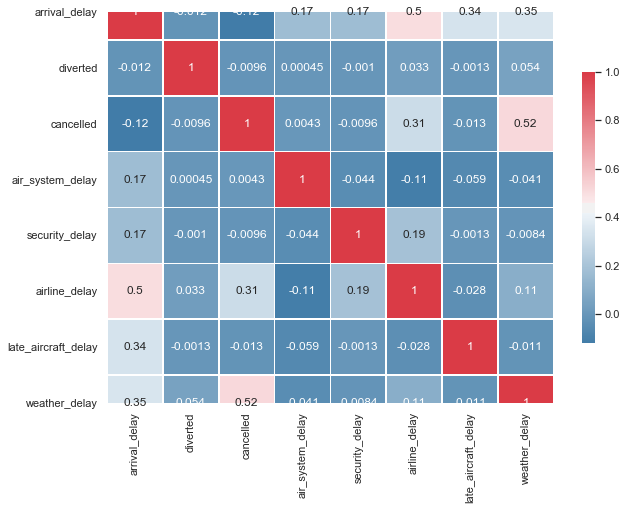

In [206]:
#aplicamos la función generada
dataset_corr(df_filled)

#### OPCION 2: Pyramid Correlation Matrix Heatmap

In [210]:
#creamos una función para crear la matriz de correlación de un dataset dado
def dataset_pyramid_corr(data):
    '''
    This function displays a pyramidal correlation matrix for the given DataFrame:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Pyramidal correlations values and matrix.
    '''
    sns.set(style="white")

    corr = data.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(10,12))
    cmap = sns.diverging_palette(260, 10, as_cmap=True)

    sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

    return plt.show()

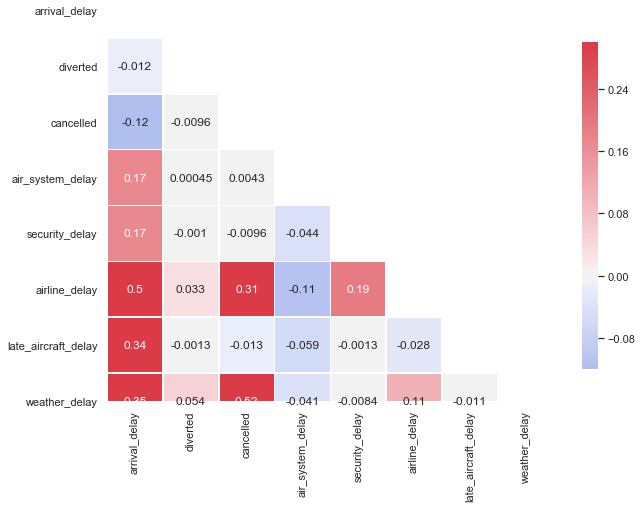

In [211]:
dataset_pyramid_corr(df_filled)

___